# Introduction

This project requires the team to compare and contrast two machine-learning models used to analyze a specified dataset. The dataset contains around 8120 instances, classification is binary where the chosen inputs are whether a mushroom is edible or poisonous (not edible). The machine-learning models are Decision trees and Random forests. Decision trees use a top-down approach and use the leaf node to show all possible outcomes of a dataset. The group applied the divide and conquer strategy. Random Forests, on the otherhand, is an ensemble of Decision Trees and generates each tree independently to make certain predictions, the results will be aggregated as a prediction for all trees.

# Classification Task

## Features
The features used for classification are as follows:


*   cap-shape
*   cap-surface
*   cap-color
*   bruises
*   odor
*   gill-attachment
*   gill-spacing
*   gill-size
*   gill-color
*   stalk-shape
*   stalk-root
*   stalk-surface-above-ring
*   stalk-surface-below-ring
*   stalk-color-above-ring
*   veil-type
*   veil-color
*   ring-number
*   ring-type
*   spore-print-color
*   population
*   habitat

These features will be used to train the machine learning model to predict whether a mushroom is edible or poisonous.






## Label

The target variable or label of the classification task is 'class'
It indicates if its edible 'e' or poisonous 'p'

## Rationale

The choice of this classification task is driven by the importance of accurately identifying whether a mushrooom is safe to eat or not. Mushroom poisoning have severe consequences, and accurately identifying if a mushroom is poisonous can be challenging for those who do not know how.

By using machine learning, we aim to build models that can assist in making more informed decisions on the edibility of mushrooms. This can be useful in foraging, as these models can be used in identifying mushrooms in the wild and make safer choices.

## Interest and Relevance

The task is interesting for our group because it combines elements of data exploration, engineering, and model building. The real-world implications of accurately classifying mushrooms also offers impactful and potentially life-saving information.

# Data Processing

The dataset will be processed through Google Drive so we must mount the Google Colaboratory file into the Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries
1. `pandas` library: *dataset reader*
2. `numpy` library: *matrix manipulation*
3. `matplotlib` library: *visual/graph representation of the data*
4. `train_test_split` module: *splitting the dataset into training and testing sets for machine learning*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Reading the Dataset
The dataset is sourced from the Google Drive folder within the path indicated between the single quotes *(in this case: `/content/drive/MyDrive/Colab Notebooks/mushrooms.csv`)* which can be replaced so long as the path reads the needed `.csv` file.

Alternatively, you can create a folder in your Drive with the same folder name (`Colab Notebooks`) and upload `mushrooms.csv` inside that folder, make sure the file is visible by checking Google Colaboratory's side panel under the **Files** as shown below:
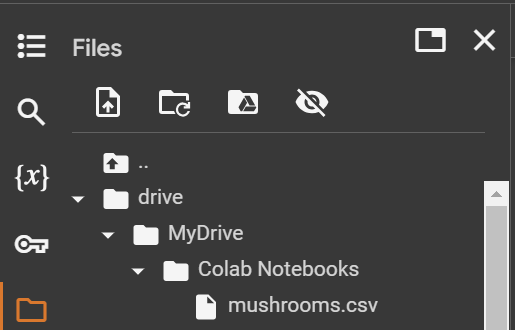

The mushroom dataset was retrieved from ***Kaggle*** in this following link:
> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [ ]:
# Importing the dataset (replace the quotes if the path to the dataset is different)
mush = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mushrooms.csv')
# Showing the contents of the dataset
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Training and Testing Datasets

Since the information we need is about the mushroom being edible or poisonous, we want to take the information under **Class** by getting the array of the Class column as shown by the `mush.iloc` for the `X` and `Y`.

In [ ]:
X = mush.iloc[:, 1:]
Y = mush.iloc[:, 0:]

## Splitting the dataset for training and testing

In [ ]:
X_train, X_test, y_train, y_test = (
      train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True))

* `X`: independent variables
* `Y`: dependent variable
* `test_size`: reserving 20% for testing while the 80% is for training
* `random_state`: sets the random seed reproducibility to ensure that the split can be replicated when the code is ran again

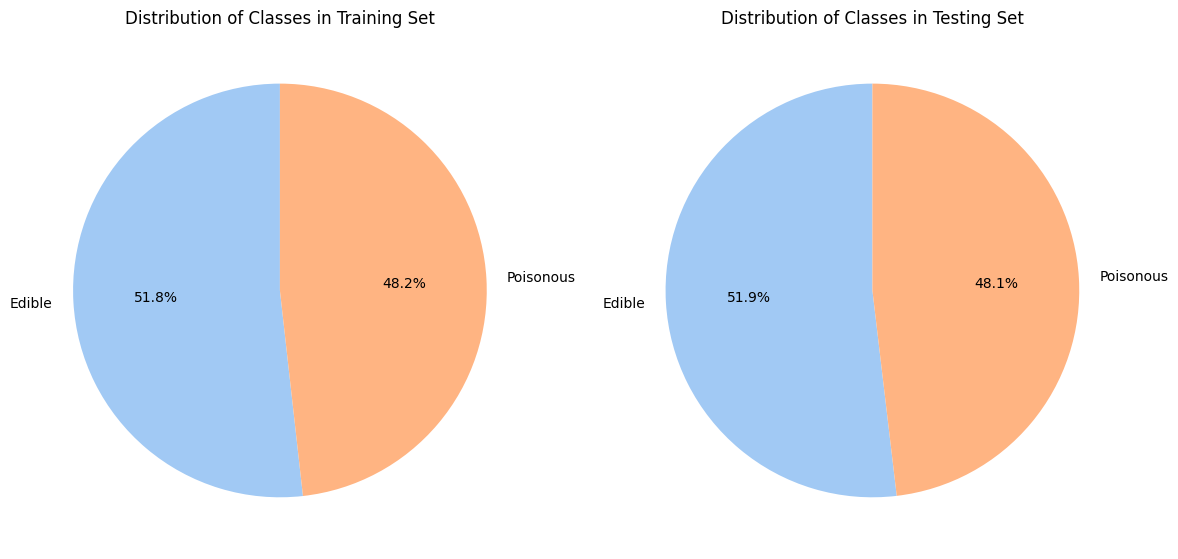

In [ ]:
import seaborn as sns

# map class labels 'p' and 'e' to readable names
class_mapping = {'p': 'Poisonous', 'e': 'Edible'}
y_train_mapped = y_train['class'].map(class_mapping)
y_test_mapped = y_test['class'].map(class_mapping)

# count occurrences of each class in the training set
class_distribution_train = y_train_mapped.value_counts()
class_distribution_test = y_test_mapped.value_counts()

plt.figure(figsize=(12, 6))

# pie chart for the training set
plt.subplot(1, 2, 1)
plt.pie(class_distribution_train, labels=class_distribution_train.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Classes in Training Set')

# pie chart for the testing set
plt.subplot(1, 2, 2)
plt.pie(class_distribution_test, labels=class_distribution_test.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Classes in Testing Set')

plt.tight_layout()
plt.show()


The figure above shows pie charts for the Training Set and the Testing set. They have identical divisions of edible and poisonous mushrooms, therefore these are valid splits. Randomizing again will always create other valid results.

## Decision Tree

Decision Tree was picked because it can capture non-linear relationships in data. It does not make assumptions about the linearity of the patterns, which makes it flexible in handling complex relationships.

It also does not require any specific distribution for the input features to be analyzed, which makes them versatile for many types of different datasets.

Decision trees are relatively easy to implement and has quick training process. It is not easily affected by outliers, increasing the accuracy of its behavior.

It also has limitations, like being prone to overfitting, which is when a function is too exactly aligned to its provided dataset.

This section prints the information about the dataset to make sure that none of the columns have null values.

In [ ]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# import libraries and modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# instantiate learning model
dt = DecisionTreeClassifier(random_state=42)

# transform categorical columns in both sets into numbers
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# fit the decision tree on the training data
dt.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred_tree = dt.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_tree}")
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_tree}")
print(f"Decision Tree Classification Report:\n{classification_rep_tree}")


Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[843   0]
 [  0 782]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



The Decision Tree correctly classified all instances, seen by its accuracy of 1.0.

Its Precision shows that it did not make any false positives. Recall shows that it also did not make any false negatives. This lead to an F1-Score of 1.0 because of this balance in precision and recall.

All in all, it scored perfect scores.

## Random Forest

Random Forest offered a lot of positives being an ensemble learning method. It builds multiple decision trees and merges them together to get more accurate predictions. This helps to reduce possible overfitting and improve the overall performance of the model.

The creation of diverse trees helps the random forest make more accurate decisions, making it less prone to overfitting. It also reduces risk of being too sensitive to noise and underlying patterns in the training data.

This section prints the information about the dataset to make sure that none of the columns have null values.

In [ ]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# import libraries and modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# instantiations of learning model
rf = RandomForestClassifier(random_state=42)

# transform categorical columns in both sets into numbers
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# fit the decision tree on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred_tree = rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print(f"Random Forest Accuracy: {accuracy_tree}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_tree}")
print(f"Random Forest Classification Report:\n{classification_rep_tree}")


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[843   0]
 [  0 782]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Conclusion

Based on our findings, the Decision Tree and Random Forest both achieved 100% accuracy. All in terms of accuracy, precision, recall, and F1-score showed 100%. This shows that both models work well with the dataset chosen. However, the number of instances may have affected the results being little for the machine to get different results. One of the issues the group faced was using the suited dataset for the project which led to some time.